In [1]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver

from IPython.display import display, Image

import time
import pandas as pd

from collections import deque
from graphviz import Digraph

In [2]:
options = Options()
options.headless = True # don't use a GUI (necessary on a VM)
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

# Web 2: Recursive Crawl

- crawling: process of finding all the webpages inside a website

example: https://tyler.caraza-harter.com/cs320/crawl/practice.html

In [3]:
# TODO: initialize url, send GET request, and display page source
url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"
b.get(url)
print(b.page_source)

<html><head></head><body>
<h1>Node: 1</h1>
<h3>Children:</h3>
<ul>
<li><a href="2.html">2</a></li><li><a href="3.html">3</a></li></ul>

</body></html>


In [4]:
def show_screen(width, height):
    b.set_window_size(width, height)
    b.save_screenshot("out.png")
    display(Image("out.png"))

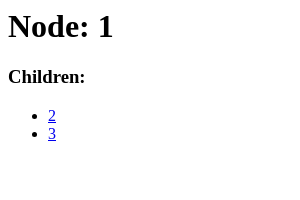

In [5]:
# TODO: show the screen
show_screen(300, 200)

### Final all hyperlinks

- Selenium operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page
    - `b.find_elements("id", <ID>)`: searches for a specific element that matches the "id"
    - `b.find_elements("tag name", <TAG>)`: searches for a specific element using corresponding tag name
    - `b.find_element` versus `b.find_elements`:
        - `find_element` gives first match
        - `find_elements` gives all matches
    - `<element obj>.text`: gives text associated with that element   
    - `<element obj>.get_attribute(<attribute>)`: gives attribute value; for ex: `<anchor_obj>.get_attribute("href")`
    
    - `b.save_screenshot("some_file.png")`: saves a screenshot of the rendered page
    - `b.set_window_size(<width>, <height>)`: controls size of the image
    - import statement: `from IPython.display import display, Image`: helps us show the screenshot as an image inside the notebook
    - `button_oject.click()`: enables us to click the button
    - `text_object.send_keys()`: enables us to send data to textbox

In [6]:
a_elements = b.find_elements("tag name", "a")
for a_element in a_elements:
    print(a_element.text, a_element.get_attribute("href"))

2 https://tyler.caraza-harter.com/cs320/crawl/practice1/2.html
3 https://tyler.caraza-harter.com/cs320/crawl/practice1/3.html


In [7]:
# TODO: Generalize to a function
def get_children(url):
    """
    Finds all hyperlinks in the given url by sending GET request and parsing page source.
    Returns a list of children URLs.
    """
    b.get(url)
    children = []
    for a_element in b.find_elements("tag name", "a"):
        children.append(a_element.get_attribute("href"))
    return children

url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"
get_children(url)

['https://tyler.caraza-harter.com/cs320/crawl/practice1/2.html',
 'https://tyler.caraza-harter.com/cs320/crawl/practice1/3.html']

### Breadth First Search

- for crawling, there is no specific "destination", as we need to find all the webpages.

CURR: https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html
TO VISIT: deque(['https://tyler.caraza-harter.com/cs320/crawl/practice1/2.html', 'https://tyler.caraza-harter.com/cs320/crawl/practice1/3.html'])
CURR: https://tyler.caraza-harter.com/cs320/crawl/practice1/2.html
TO VISIT: deque(['https://tyler.caraza-harter.com/cs320/crawl/practice1/3.html', 'https://tyler.caraza-harter.com/cs320/crawl/practice1/4.html'])
CURR: https://tyler.caraza-harter.com/cs320/crawl/practice1/3.html
TO VISIT: deque(['https://tyler.caraza-harter.com/cs320/crawl/practice1/4.html', 'https://tyler.caraza-harter.com/cs320/crawl/practice1/5.html'])
CURR: https://tyler.caraza-harter.com/cs320/crawl/practice1/4.html
TO VISIT: deque(['https://tyler.caraza-harter.com/cs320/crawl/practice1/5.html', 'https://tyler.caraza-harter.com/cs320/crawl/practice1/6.html'])
CURR: https://tyler.caraza-harter.com/cs320/crawl/practice1/5.html
TO VISIT: deque(['https://tyler.caraza-harter.com/cs320/crawl/practice1/6.html'])

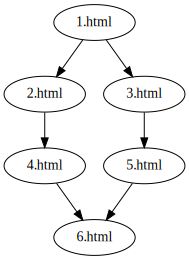

In [8]:
start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"
#start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice7/1.html"

to_visit = deque([start_url])
added = {start_url} # Why use a set to keep track of visited nodes?

# TODO: create a Digraph
g = Digraph()

while len(to_visit) > 0: 
    curr_node = to_visit.popleft()
    print("CURR:", curr_node)
    
    # TODO: add current node to digraph
    g.node(curr_node.split("/")[-1])
    
    # TODO: how do we get all the children?
    children = get_children(curr_node)
    
    #show_screen(300, 200)
    
    for child in children:
        # TODO: add an edge
        g.edge(curr_node.split("/")[-1], child.split("/")[-1])
        
        if not (child in added):
            to_visit.append(child)
            added.add(child)
            
    print("TO VISIT:", to_visit)
    
g